In [1]:
import pandas as pd
from apyori import apriori
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
# networkx version 2.4 이상
# matplot version 3.4이상

In [2]:
# df = pd.read_csv("이재명_nouns_fb.csv")['noun']
# df = pd.read_csv("윤석열_nouns_fb.csv")['noun']
# df = pd.read_csv("이재명_nouns_tw.csv")['nouns']
# df = pd.read_csv("윤석열_nouns_tw.csv")['nouns']
df = pd.read_csv("이재명_nouns_yt.csv")['noun']
# df = pd.read_csv("윤석열_nouns_yt.csv")['noun']


transactions = []
for x in df:
    tmp = x.replace('[', '').replace(']', '').replace('\'', '').replace(',', '').split()
    transactions.append([y for y in tmp if len(y) > 1]) # 길이가 1인 문자 제거
transactions = [transaction for transaction in transactions if len(transaction) > 0] # 공백 문자열 제거

In [3]:
result = (list(apriori(transactions, min_support=0.005)))
df = pd.DataFrame(result)
df['length'] = df['items'].apply(lambda x: len(x))
df = df[(df['length'] == 2) & (df['support'] >= 0.005)].sort_values(by='support', ascending=False)

In [4]:
G = nx.Graph()
ar = (df['items']); G.add_edges_from(ar)

In [5]:
pr = nx.pagerank(G)
nsize = np.array([v for v in pr.values()])
nsize = 5000 * (nsize - min(nsize)) / (max(nsize) - min(nsize))

In [6]:
# pos = nx.planar_layout(G)
# pos = nx.rescale_layout(G)
# pos = nx.fruchterman_reingold_layout(G)
# pos = nx.spectral_layout(G)
# pos = nx.random_layout(G)
# pos = nx.shell_layout(G)
# pos = nx.bipartite_layout(G)
pos = nx.circular_layout(G)
# pos = nx.spring_layout(G)
# pos = nx.kamada_kawai_layout(G)

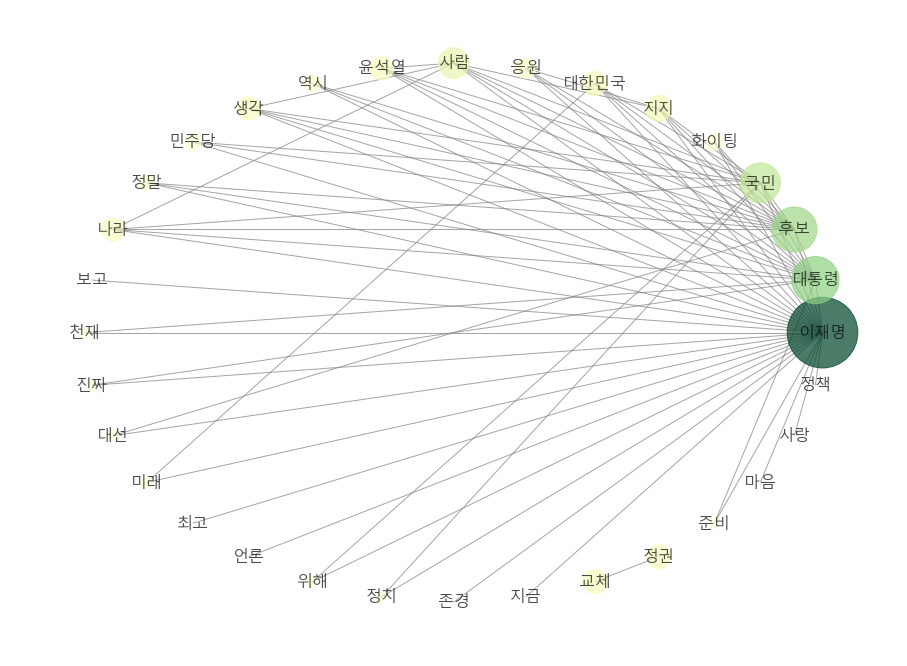

In [7]:
plt.figure(figsize=(16, 12)); plt.axis('off')
nx.draw_networkx(G, font_size=16,
                 pos=pos, font_family='Malgun Gothic', node_color=list(pr.values()), node_size=nsize,
                 alpha=0.7, edge_color='.5', cmap=plt.cm.YlGn)